# Business and Operation Analysis of New Store

## Data Preparation and Cleaning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt  # for datetime datatype
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

## Data Loading for Transaction Data (dfTrx)

#### Load Transactional Data csv file into a Pandas Dataframe

In [2]:
dtParser = lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M")  # this is how the timestamp is extracted
dfTrx = pd.read_csv('TrxData.csv', parse_dates=['Timestamp'], date_parser=dtParser)
dfTrx.head()

,Receipt,Timestamp,Item,Qty
0,40093509,2020-08-10 12:29:00,CW04293,1
1,20098024,2020-08-10 12:37:00,CU06275,1
2,20098025,2020-08-10 12:39:00,CW06070,1
3,40093510,2020-08-10 13:18:00,CJ04176,1
4,40093510,2020-08-10 13:18:00,CZ06087,2


## Data Validation (dfTrx)

#### Check if there are any null values in the dataframe

In [3]:
dfTrx.isna().sum()

Receipt      0
Timestamp    0
Item         0
Qty          0
dtype: int64

#### There are no null values in the data. Thus we will not drop any row

#### Check if the combination of Receipt and Item in each row are unique

In [4]:
dfTrx.shape[0] == dfTrx.groupby(['Receipt', 'Item']).size().reset_index().index.nunique()

True

#### There isn't any duplicate among the rows

## Data Transformation (dfTrx)

In [5]:
dfTrx['Date'] = dfTrx.Timestamp.dt.date
dfTrx['WeekNum'] = dfTrx.Timestamp.dt.isocalendar().week
dfTrx['DOW'] = dfTrx.Timestamp.dt.dayofweek  # 0 - Monday, .., 6 - Sunday
dfTrx['WdWn'] = dfTrx.DOW.apply(lambda x: 'Weekend' if (x > 3) else 'Weekday')
dfTrx.head()

,Receipt,Timestamp,Item,Qty,Date,WeekNum,DOW,WdWn
0,40093509,2020-08-10 12:29:00,CW04293,1,2020-08-10,33,0,Weekday
1,20098024,2020-08-10 12:37:00,CU06275,1,2020-08-10,33,0,Weekday
2,20098025,2020-08-10 12:39:00,CW06070,1,2020-08-10,33,0,Weekday
3,40093510,2020-08-10 13:18:00,CJ04176,1,2020-08-10,33,0,Weekday
4,40093510,2020-08-10 13:18:00,CZ06087,2,2020-08-10,33,0,Weekday


In [6]:
dfTrx['Hour'] = dfTrx.Timestamp.dt.hour  # xx = xx:00:00 to xx:59:59
dfTrx.head()

,Receipt,Timestamp,Item,Qty,Date,WeekNum,DOW,WdWn,Hour
0,40093509,2020-08-10 12:29:00,CW04293,1,2020-08-10,33,0,Weekday,12
1,20098024,2020-08-10 12:37:00,CU06275,1,2020-08-10,33,0,Weekday,12
2,20098025,2020-08-10 12:39:00,CW06070,1,2020-08-10,33,0,Weekday,12
3,40093510,2020-08-10 13:18:00,CJ04176,1,2020-08-10,33,0,Weekday,13
4,40093510,2020-08-10 13:18:00,CZ06087,2,2020-08-10,33,0,Weekday,13


## Data Loading for Product Data (dfPrd)

#### Load Product Data csv file into a Pandas Dataframe

In [7]:
dfPrd = pd.read_csv('ProdDef.csv')
dfPrd.head()

,Item,C1,C2,C3,Marketing
0,1300690,S11,P,D2,Y
1,1303000,S12,P,D2,NaN
2,1501186,S31,P,D2,NaN
3,1503265,S21,P,D2,NaN
4,3002350,S12,L,D2,NaN


## Data Validation (dfPrd)

#### Check for the null values in the dataframe

In [8]:
dfPrd.isna().sum()

Item            0
C1              0
C2              0
C3              0
Marketing    3215
dtype: int64

#### It is fine to have the null values in the Marketing column. So we will not drop any row.

#### Check if the Items are unique or not.

In [9]:
dfPrd.shape[0] == dfPrd.Item.nunique()

True

#### There are no duplicate items in the dataframe.

## Data Transformation (dfPrd)

#### Dropping all the unnecessary columns from the Product Dataframe i.e. C2 & C3 columns are not used in the study, are to be dropped. 

In [10]:
dfPrd.drop(['C2', 'C3'], 1, inplace=True)
dfPrd.head()

,Item,C1,Marketing
0,1300690,S11,Y
1,1303000,S12,NaN
2,1501186,S31,NaN
3,1503265,S21,NaN
4,3002350,S12,NaN


In [11]:
dfPrd['Gender'] = dfPrd.C1.apply(lambda x: 'M' if (x[2] == '1') else 'F' if (x[2] == '2') else 'N')
dfPrd.head()

,Item,C1,Marketing,Gender
0,1300690,S11,Y,M
1,1303000,S12,NaN,F
2,1501186,S31,NaN,M
3,1503265,S21,NaN,M
4,3002350,S12,NaN,F


In [12]:
# Function DefAgeGroup(x) is to define age group based on the 2nd character of C1.
def DefAgeGroup(x):
    AgeGrp = int(x[1])
    return 'AD' if (AgeGrp == 1) else 'GS' if (AgeGrp == 2) else 'PS' if (AgeGrp == 3) else 'TD'

In [13]:
dfPrd['AgeGroup'] = dfPrd.C1.apply(lambda x: DefAgeGroup(x))

In [14]:
# Function IsProd4Kids(x) is to check if C1 <x> indicates the associated product is for Kids'.
def IsProd4Kids(x):
    return True if (int(x[1]) > 1) else False

In [15]:
dfPrd['Kids'] = dfPrd.C1.apply(lambda x: IsProd4Kids(x))
dfPrd.head()

,Item,C1,Marketing,Gender,AgeGroup,Kids
0,1300690,S11,Y,M,AD,False
1,1303000,S12,NaN,F,AD,False
2,1501186,S31,NaN,M,PS,True
3,1503265,S21,NaN,M,GS,True
4,3002350,S12,NaN,F,AD,False


#### For better preparation of data a new dataframe is created by merging the Transactional Data and the Product Reference Data

In [16]:
dfTrxPrd = dfTrx.merge(dfPrd, how='left', on='Item', validate='m:1')
dfTrxPrd.head()

,Receipt,Timestamp,Item,Qty,Date,WeekNum,DOW,WdWn,Hour,C1,Marketing,Gender,AgeGroup,Kids
0,40093509,2020-08-10 12:29:00,CW04293,1,2020-08-10,33,0,Weekday,12,S12,NaN,F,AD,False
1,20098024,2020-08-10 12:37:00,CU06275,1,2020-08-10,33,0,Weekday,12,S13,NaN,N,AD,False
2,20098025,2020-08-10 12:39:00,CW06070,1,2020-08-10,33,0,Weekday,12,S13,NaN,N,AD,False
3,40093510,2020-08-10 13:18:00,CJ04176,1,2020-08-10,33,0,Weekday,13,S12,NaN,F,AD,False
4,40093510,2020-08-10 13:18:00,CZ06087,2,2020-08-10,33,0,Weekday,13,S12,NaN,F,AD,False


#### Check if there are undefined Items in the dataframe

In [17]:
dfTrxPrd.Item.isna().sum()

0

#### All the Items are identified from the Product list

## Exploratory Analysis and Visualization

#### For better visulaisation in day of week part, make dictionary in which numbers on key side and day name on value side

In [18]:
dctDOW = {0: 'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}  # ref Day of Week Dict

In [19]:
sns.set_style("darkgrid")

#### Group the data by date and day of week & count the number of receipts & sold qty by each date

In [20]:
dfDailyTrx = dfTrx.groupby(['Date', 'DOW'], as_index=False).Receipt.nunique()
dfDailyQty = dfTrx.groupby(['Date', 'DOW'], as_index=False).Qty.sum()

# Set up Dates as the ticks on x-axis
srDateList = dfDailyTrx.Date.apply(lambda x: x.strftime('%m/%d')) + '\n' + dfDailyTrx.DOW.apply(lambda x: dctDOW.get(x))

#### Put data in a line chart to take a look at the daily transactions per reciept count and sold quantities on the daily basis

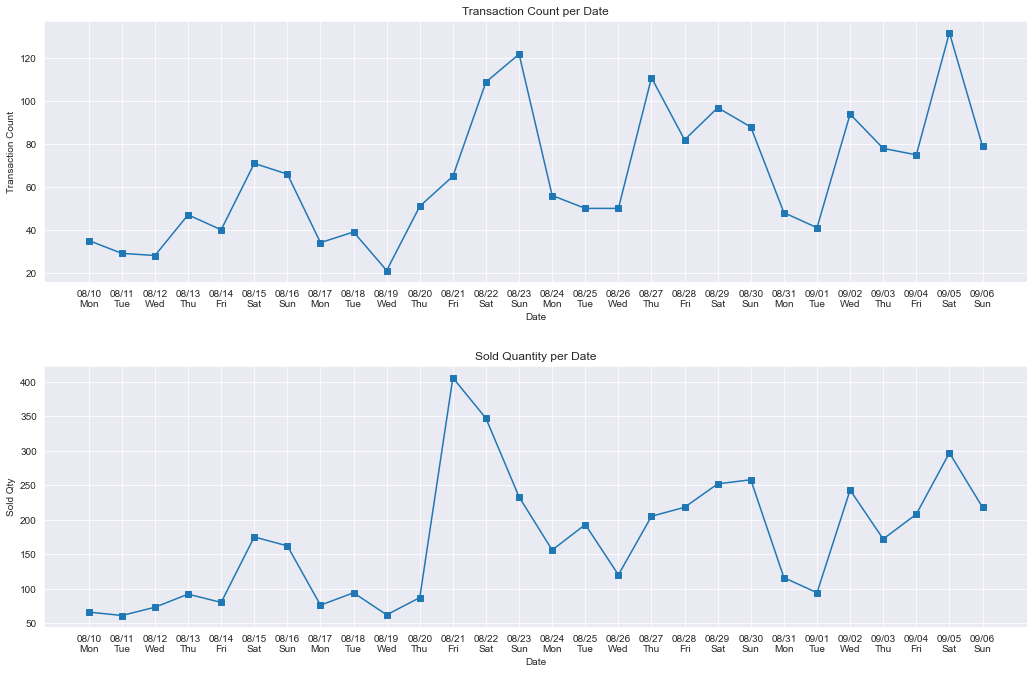

In [21]:
# Set up 2 x 1 chart group
figDates, chtDates = plt.subplots(2, 1, figsize=(15, 10))

chtDates[0].plot(srDateList, dfDailyTrx.Receipt, marker='s')
chtDates[0].set_xlabel('Date')
chtDates[0].set_ylabel('Transaction Count')
chtDates[0].set_title('Transaction Count per Date')

chtDates[1].plot(srDateList, dfDailyQty.Qty, marker='s')
chtDates[1].set_xlabel('Date')
chtDates[1].set_ylabel('Sold Qty')
chtDates[1].set_title('Sold Quantity per Date')

plt.tight_layout(pad=3)
plt.show()

#### The transaction count and the sold quantities on weekends are higher as compared to the working days

#### For better look let's group the data by differetn angles- by weekely and on the daily basis

In [22]:
dfWeeklyTrx = dfTrx.groupby('WeekNum', as_index=False).Receipt.nunique()
dfWeeklyQty = dfTrx.groupby('WeekNum', as_index=False).Qty.sum()

# Set up Week Number as the ticks on x-axis
srWeekNum = dfWeeklyTrx.WeekNum.astype(str)

#### Put the data in a line chart to show how the transactions and sold quantities are changing by week

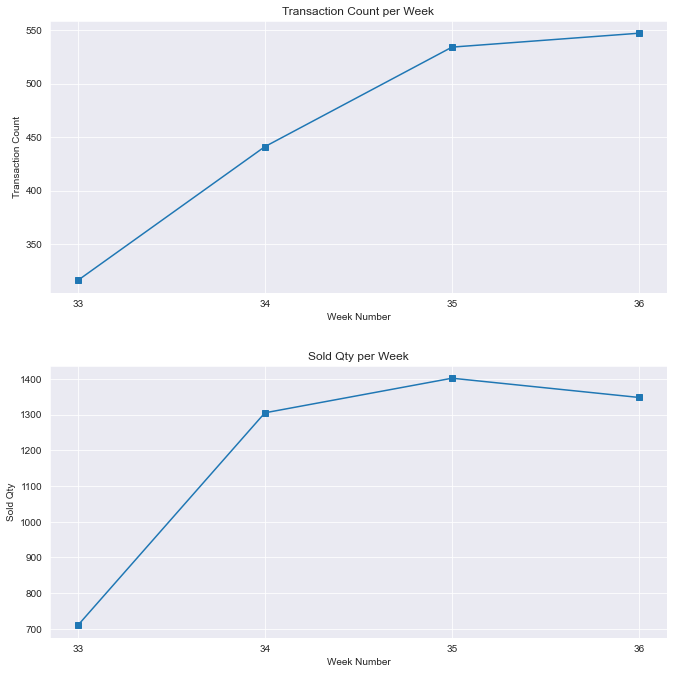

In [23]:
# Set up 2 x 1 chart group
figWeek, chtWeek = plt.subplots(2, 1, figsize=(10, 10))

chtWeek[0].plot(srWeekNum, dfWeeklyTrx.Receipt, marker='s')
chtWeek[0].set_xlabel('Week Number')
chtWeek[0].set_ylabel('Transaction Count')
chtWeek[0].set_title('Transaction Count per Week')

chtWeek[1].plot(srWeekNum, dfWeeklyQty.Qty, marker='s')
chtWeek[1].set_xlabel('Week Number')
chtWeek[1].set_ylabel('Sold Qty')
chtWeek[1].set_title('Sold Qty per Week')

plt.tight_layout(pad=3)
plt.show()

#### There is decline in sold quantities from week 35 to week 36 but there is increase in transactions

#### Let's take look at the trend by day of week

In [24]:
dfDOWTrx = dfTrx.groupby('DOW', as_index=False).Receipt.nunique()
dfDOWQty = dfTrx.groupby('DOW', as_index=False).Qty.sum()

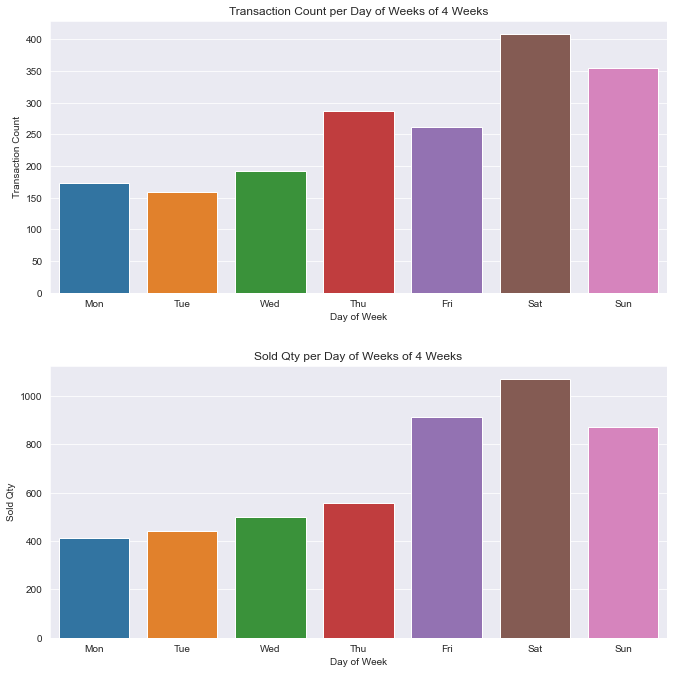

In [25]:
# Set up 2 x 1 chart group
figDOW, chtDOW = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x='DOW', y='Receipt', data=dfDOWTrx, ax=chtDOW[0])
chtDOW[0].set_xlabel('Day of Week')
chtDOW[0].set_xticklabels(dctDOW.values())
chtDOW[0].set_ylabel('Transaction Count')
chtDOW[0].set_title('Transaction Count per Day of Weeks of 4 Weeks')

sns.barplot(x='DOW', y='Qty', data=dfDOWQty, ax=chtDOW[1])
chtDOW[1].set_xlabel('Day of Week')
chtDOW[1].set_xticklabels(dctDOW.values())
chtDOW[1].set_ylabel('Sold Qty')
chtDOW[1].set_title('Sold Qty per Day of Weeks of 4 Weeks')

plt.tight_layout(pad=3)
plt.show()

#### From the above bar plot, transactions betwen Mondays and Wednesdays had significant gaps when compared to the other days.  Thursdays had a higher transactions than Fridays. Saturdays and Sundays had the highest transactions of the week.

#### Let's take look on the business by stripping the hot-selling items

In [26]:
dfDailyTrxWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby(['Date'], as_index=False).Receipt.nunique()
dfDailyQtyWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby(['Date'], as_index=False).Qty.sum()

#### Put the data in a line chart to show how the business is going with and without the hot-selling items

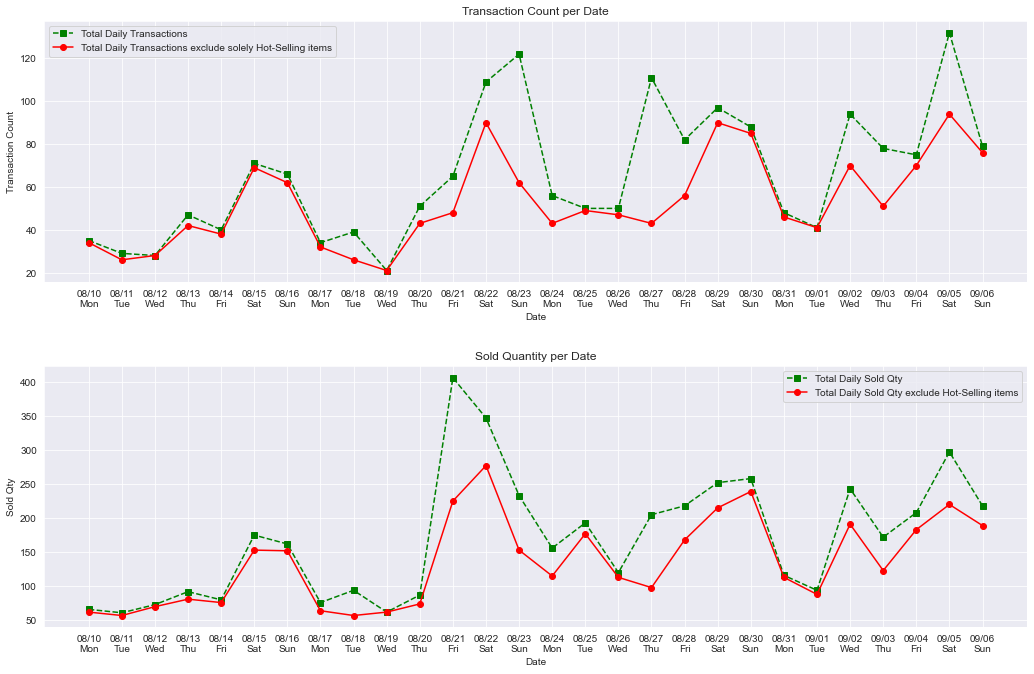

In [27]:
# Set up 2 x 1 chart group
figDates, chtDates = plt.subplots(2, 1, figsize=(15, 10))

chtDates[0].plot(srDateList, dfDailyTrx.Receipt, 's--g')
chtDates[0].plot(srDateList, dfDailyTrxWoHS.Receipt, 'o-r')
chtDates[0].set_xlabel('Date')
chtDates[0].set_ylabel('Transaction Count')
chtDates[0].set_title('Transaction Count per Date')
chtDates[0].legend(('Total Daily Transactions', 'Total Daily Transactions exclude solely Hot-Selling items'))

chtDates[1].plot(srDateList, dfDailyQty.Qty, 's--g')
chtDates[1].plot(srDateList, dfDailyQtyWoHS.Qty, 'o-r')
chtDates[1].set_xlabel('Date')
chtDates[1].set_ylabel('Sold Qty')
chtDates[1].set_title('Sold Quantity per Date')
chtDates[1].legend(('Total Daily Sold Qty', 'Total Daily Sold Qty exclude Hot-Selling items'))

plt.tight_layout(pad=3)
plt.show()

#### From above line chart business growth is slightly low without the hot-selling items

#### Let's take a look at the Unit Per Transaction (UPT)

In [28]:
dfDailyTrxWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby(['Date'], as_index=False).Receipt.nunique()
dfDailyQtyWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby(['Date'], as_index=False).Qty.sum()
dfDailyUPTWoHS = dfDailyTrxWoHS.merge(dfDailyQtyWoHS, on='Date')
dfDailyUPTWoHS['UPT'] = dfDailyUPTWoHS.Qty / dfDailyUPTWoHS.Receipt

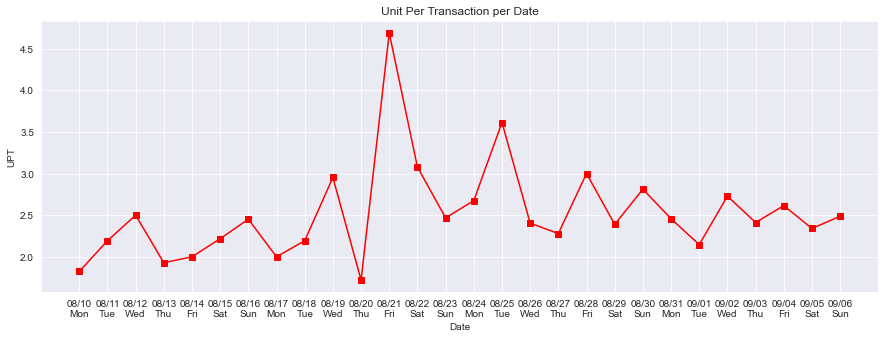

In [29]:
plt.figure(figsize=(15, 5))
plt.plot(srDateList, dfDailyUPTWoHS.UPT, 's-r')
plt.xlabel('Date')
plt.ylabel('UPT')
plt.title('Unit Per Transaction per Date')

plt.show()

#### From the above line chart Unit Per Transaction (UPT) is increased from the original

In [30]:
dfWklyTrxWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby('WeekNum', as_index=False).Receipt.nunique()
dfWklyQtyWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby('WeekNum', as_index=False).Qty.sum()

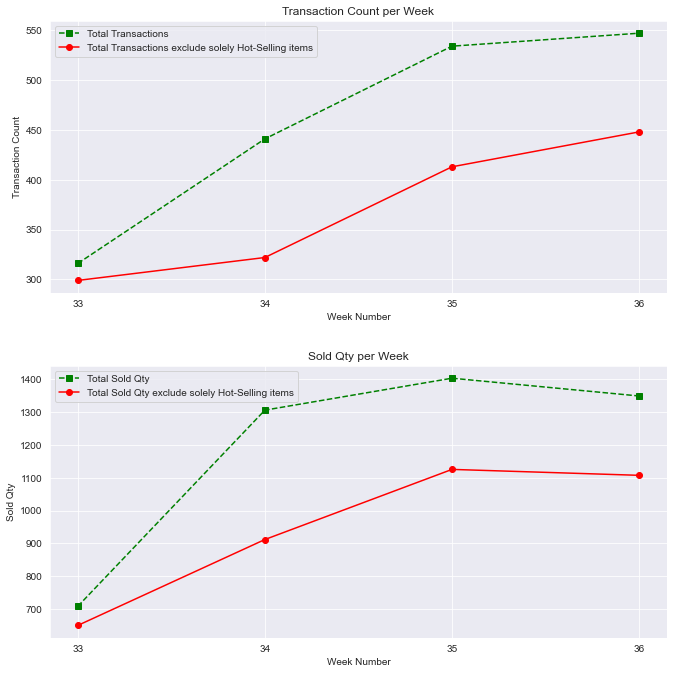

In [31]:
# Set up 2 x 1 chart group
figWeek, chtWeek = plt.subplots(2, 1, figsize=(10, 10))

chtWeek[0].plot(srWeekNum, dfWeeklyTrx.Receipt, 's--g')
chtWeek[0].plot(srWeekNum, dfWklyTrxWoHS.Receipt, 'o-r')
chtWeek[0].set_xlabel('Week Number')
chtWeek[0].set_ylabel('Transaction Count')
chtWeek[0].set_title('Transaction Count per Week')
chtWeek[0].legend(('Total Transactions', 'Total Transactions exclude solely Hot-Selling items'))

chtWeek[1].plot(srWeekNum, dfWeeklyQty.Qty, 's--g')
chtWeek[1].plot(srWeekNum, dfWklyQtyWoHS.Qty, 'o-r')
chtWeek[1].set_xlabel('Week Number')
chtWeek[1].set_ylabel('Sold Qty')
chtWeek[1].set_title('Sold Qty per Week')
chtWeek[1].legend(('Total Sold Qty', 'Total Sold Qty exclude solely Hot-Selling items'))

plt.tight_layout(pad=3)
plt.show()

#### After removing the sales of all hot-selling products, the sales gap between Week 35 and Week 36 was closer. 

In [32]:
dfDOWTrxWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby('DOW', as_index=False).Receipt.nunique()
dfDOWQtyWoHS = dfTrxPrd.loc[(dfTrxPrd.Marketing != 'Y'), :].groupby('DOW', as_index=False).Qty.sum()

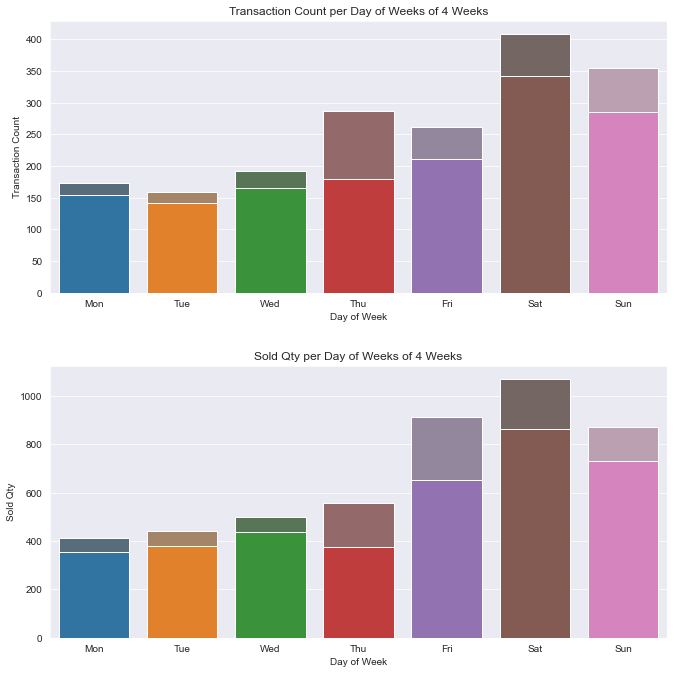

In [33]:
# Set up 2 x 1 chart group
figDOW, chtDOW = plt.subplots(2, 1, figsize=(10, 10))

sns.barplot(x='DOW', y='Receipt', data=dfDOWTrx, ax=chtDOW[0], saturation=.25)
sns.barplot(x='DOW', y='Receipt', data=dfDOWTrxWoHS, ax=chtDOW[0])
chtDOW[0].set_xlabel('Day of Week')
chtDOW[0].set_xticklabels(dctDOW.values())
chtDOW[0].set_ylabel('Transaction Count')
chtDOW[0].set_title('Transaction Count per Day of Weeks of 4 Weeks')

sns.barplot(x='DOW', y='Qty', data=dfDOWQty, ax=chtDOW[1], saturation=.25)
sns.barplot(x='DOW', y='Qty', data=dfDOWQtyWoHS, ax=chtDOW[1])
chtDOW[1].set_xlabel('Day of Week')
chtDOW[1].set_xticklabels(dctDOW.values())
chtDOW[1].set_ylabel('Sold Qty')
chtDOW[1].set_title('Sold Qty per Day of Weeks of 4 Weeks')

plt.tight_layout(pad=3)
plt.show()

#### The "darken" color blocks are the portions being the sales of hot-selling items on transactions and sold quantities. After the exclusion of the sales of hot-selling items, some observations still remain true while some do not. Saturdays had the highest transactions followed by Sunday and Friday.

## Consumer Traffic Insights Purely from Sales Data in Store

#### Let's dive deeper by looking at the hourly transactions. A heatmap is used for the presentation, and with different degree from orange to red

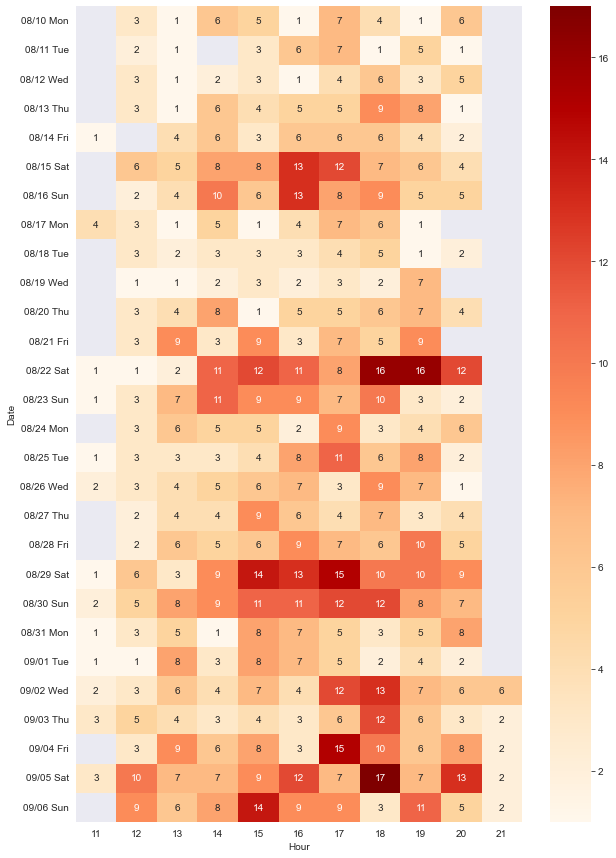

In [34]:
dfHrDyTrxWoHS = dfTrxPrd.loc[dfTrxPrd['Marketing'] != 'Y', :].groupby(['Date', 'DOW', 'Hour'], as_index=False).Receipt.nunique()
dfHrDyTrxWoHS['DateDOW'] = dfHrDyTrxWoHS.Date.apply(lambda x: x.strftime('%m/%d')) + ' ' + dfHrDyTrxWoHS.DOW.apply(lambda y: dctDOW.get(y))
pvtHrDyTrxWoHS = dfHrDyTrxWoHS.pivot(index='DateDOW', columns='Hour', values='Receipt')

plt.figure(figsize=(10, 15))
hmHrDyTrxWoHS = sns.heatmap(pvtHrDyTrxWoHS, cmap='OrRd', annot=True)
plt.xlabel('Hour')
plt.ylabel('Date')
plt.show()

#### For better presentation let's group the dates into day of week

In [35]:
dfHrDOWTrxWoHS = dfTrxPrd.loc[dfTrxPrd['Marketing'] != 'Y', :].groupby(['DOW', 'Hour'], as_index=False).Receipt.nunique()
dfHrDOWTrxWoHS['DOWNm'] = dfHrDOWTrxWoHS.DOW.apply(lambda x: dctDOW.get(x))
pvtHrDOWTrxWoHS = dfHrDOWTrxWoHS.pivot(index='DOW', columns='Hour', values='Receipt')

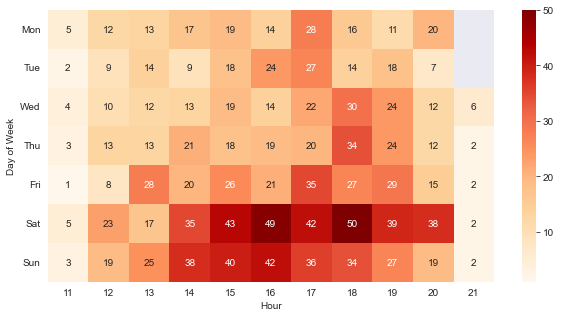

In [36]:
plt.figure(figsize=(10, 5))
hmHrDOWTrxWoHS = sns.heatmap(pvtHrDOWTrxWoHS, cmap='OrRd', annot=True)
hmHrDOWTrxWoHS.set_yticklabels(dctDOW.values(), rotation=0)
plt.ylabel('Day of Week')
plt.show()

#### From the chart above, it is not difficult to find the best session for lunch break will be 2pm to 4pm from Monday to Friday. However in Saturday and Sunday, it seems like it's better to shift the lunch period to between 12pm to 2pm

#### Let's take the look at the sold quantities wrt gender on weekely basis

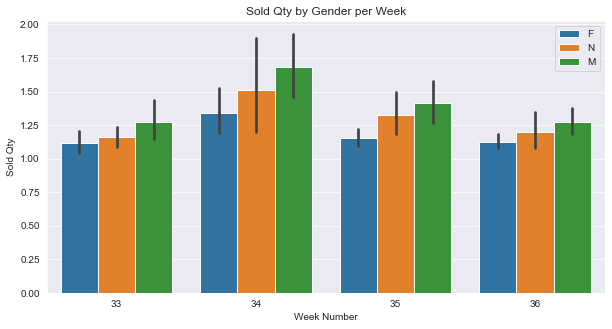

In [37]:
plt.figure(figsize=(10, 5))

sns.barplot(x='WeekNum', y='Qty', hue='Gender', data=dfTrxPrd)
plt.xlabel('Week Number')
plt.ylabel('Sold Qty')
plt.title('Sold Qty by Gender per Week')
plt.legend()
plt.show()

# Kid's Corner Analysis

In [38]:
dfTrxPrd.head()

,Receipt,Timestamp,Item,Qty,Date,WeekNum,DOW,WdWn,Hour,C1,Marketing,Gender,AgeGroup,Kids
0,40093509,2020-08-10 12:29:00,CW04293,1,2020-08-10,33,0,Weekday,12,S12,NaN,F,AD,False
1,20098024,2020-08-10 12:37:00,CU06275,1,2020-08-10,33,0,Weekday,12,S13,NaN,N,AD,False
2,20098025,2020-08-10 12:39:00,CW06070,1,2020-08-10,33,0,Weekday,12,S13,NaN,N,AD,False
3,40093510,2020-08-10 13:18:00,CJ04176,1,2020-08-10,33,0,Weekday,13,S12,NaN,F,AD,False
4,40093510,2020-08-10 13:18:00,CZ06087,2,2020-08-10,33,0,Weekday,13,S12,NaN,F,AD,False


#### Right now, there isn't any Kids' items being hot-selling items, don't need to take hot-selling items under consideration


In [39]:
dfDailyKidsTrx = dfTrxPrd.loc[dfTrxPrd.Kids, :].groupby(['Date'], as_index=False).Receipt.nunique()
dfDailyKidsQty = dfTrxPrd.loc[dfTrxPrd.Kids, :].groupby(['Date'], as_index=False).Qty.sum()

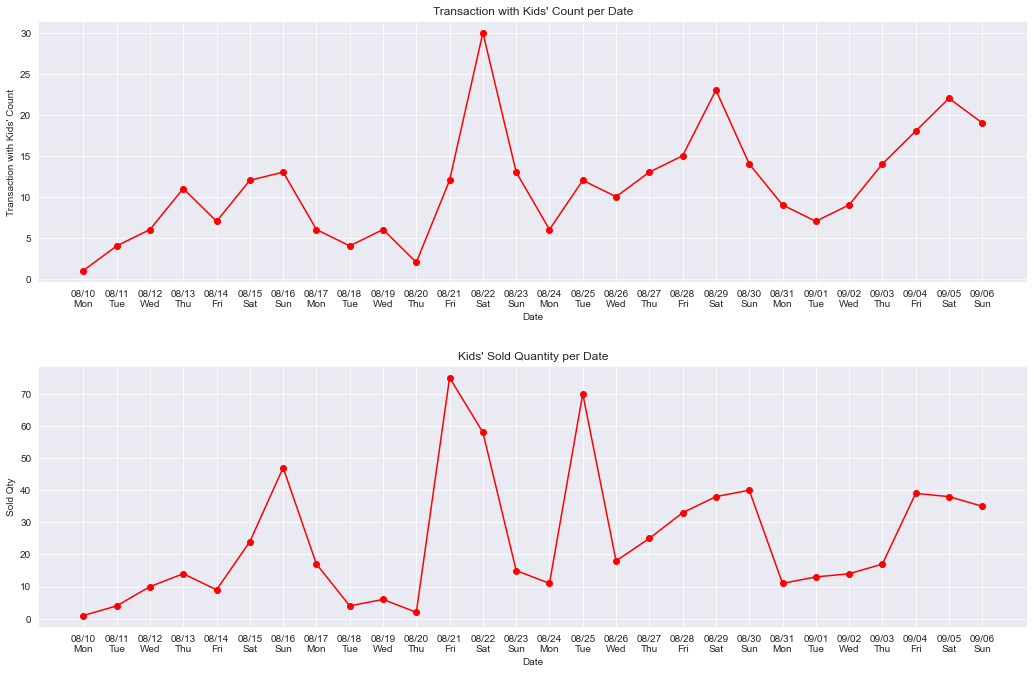

In [40]:
# Set up 2 x 1 chart group
figDates, chtDates = plt.subplots(2, 1, figsize=(15, 10))

# Use the cht for plotting
chtDates[0].plot(srDateList, dfDailyKidsTrx.Receipt, 'o-r')
chtDates[0].set_xlabel('Date')
chtDates[0].set_ylabel("Transaction with Kids' Count")
chtDates[0].set_title("Transaction with Kids' Count per Date")

chtDates[1].plot(srDateList, dfDailyKidsQty.Qty, 'o-r')
chtDates[1].set_xlabel('Date')
chtDates[1].set_ylabel('Sold Qty')
chtDates[1].set_title("Kids' Sold Quantity per Date")

plt.tight_layout(pad=3)
plt.show()

#### From the charts above, it's easy to figure out that the major transactions of Kids' stuff are in Weekends, including most Fridays

In [41]:
# Right now, there isn't any Kid's items being hot-selling items.  So, we don't need to take hot-selling items under consideration.
dfDailyKidsTrx = dfTrxPrd.loc[dfTrxPrd.Kids, :].groupby(['Date'], as_index=False).Receipt.nunique()
dfDailyKidsTrxShare = dfDailyTrxWoHS.merge(dfDailyKidsTrx, how = 'left', on='Date', suffixes=('_All', '_Kids'))
dfDailyKidsTrxShare['KidsTrxShare'] = dfDailyKidsTrxShare.Receipt_Kids / dfDailyKidsTrxShare.Receipt_All

dfDailyKidsQty = dfTrxPrd.loc[dfTrxPrd.Kids, :].groupby(['Date'], as_index=False).Qty.sum()
dfDailyKidsQtyShare = dfDailyQtyWoHS.merge(dfDailyKidsQty, how = 'left', on='Date', suffixes=('_All', '_Kids'))
dfDailyKidsQtyShare['KidsQtyShare'] = dfDailyKidsQtyShare.Qty_Kids / dfDailyKidsQtyShare.Qty_All

#### Let's take look at the Kid's share % in the transactions and the sold quantities

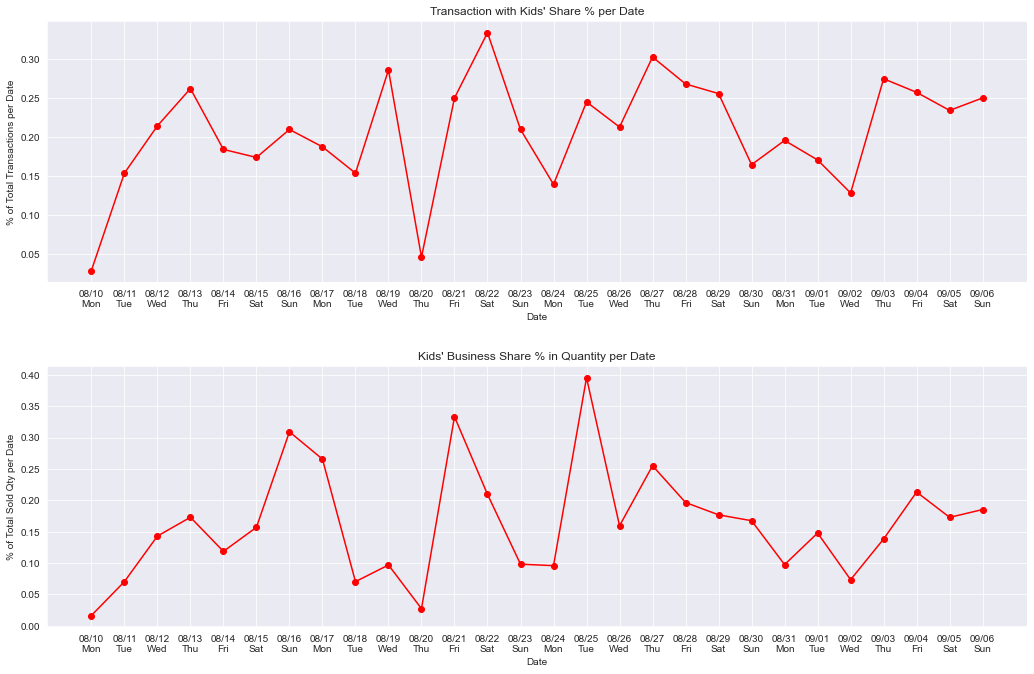

In [42]:
# Set up 2 x 1 chart group
figDates, chtDates = plt.subplots(2, 1, figsize=(15, 10))

# Use the cht for plotting
chtDates[0].plot(srDateList, dfDailyKidsTrxShare.KidsTrxShare, 'o-r')
chtDates[0].set_xlabel('Date')
chtDates[0].set_ylabel('% of Total Transactions per Date')
chtDates[0].set_title("Transaction with Kids' Share % per Date")

chtDates[1].plot(srDateList, dfDailyKidsQtyShare.KidsQtyShare, 'o-r')
chtDates[1].set_xlabel('Date')
chtDates[1].set_ylabel('% of Total Sold Qty per Date')
chtDates[1].set_title("Kids' Business Share % in Quantity per Date")

plt.tight_layout(pad=3)
plt.show()

#### Let's take a look at kids' business by age group, i.e, toddler, pre-school and grade school. Look at the percentage share among these age groups, and drop the transaction split.

In [43]:
srQtyKidsAgeGrp = dfTrxPrd.loc[dfTrxPrd.Kids, :].groupby(['AgeGroup']).Qty.sum()
srQtyKidsGender = dfTrxPrd.loc[dfTrxPrd.Kids, :].groupby(['Gender']).Qty.sum()

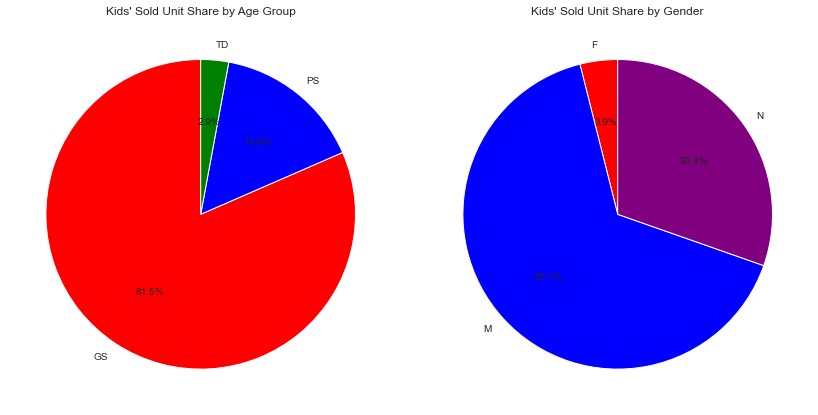

In [44]:
# Set up 1 x 2 chart group
figKids, chtKids = plt.subplots(1, 2, figsize=(12, 12))

# Use the cht for plotting
chtKids[0].pie(srQtyKidsAgeGrp, labels=srQtyKidsAgeGrp.index, colors=('red', 'blue', 'green'), startangle=90, autopct='%.1f%%')
chtKids[0].set_title("Kids' Sold Unit Share by Age Group")

chtKids[1].pie(srQtyKidsGender, labels=srQtyKidsGender.index, colors=('red', 'blue', 'purple'), startangle=90, autopct='%.1f%%')
chtKids[1].set_title("Kids' Sold Unit Share by Gender")

plt.tight_layout(pad=3)
plt.show()

#### Let's take a look at what time of the day when these kids' purchases created

In [45]:
dfHrDOWTrxKids = dfTrxPrd.loc[dfTrxPrd.Kids, :].groupby(['DOW', 'Hour'], as_index=False).Receipt.nunique()
dfHrDOWTrxKids['DOWNm'] = dfHrDOWTrxKids.DOW.apply(lambda x: dctDOW.get(x))
pvtHrDOWTrxKids = dfHrDOWTrxKids.pivot(index='DOW', columns='Hour', values='Receipt')

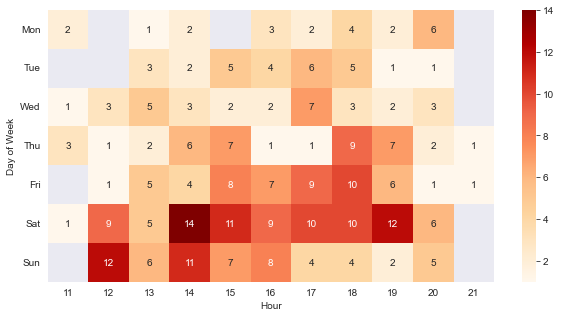

In [46]:
plt.figure(figsize=(10, 5))
hmHrDOWTrxKids = sns.heatmap(pvtHrDOWTrxKids, cmap='OrRd', annot=True)
hmHrDOWTrxKids.set_yticklabels(dctDOW.values(), rotation=0)
plt.ylabel('Day of Week')
plt.show()

#### With this heatmap most Kid's items were sold on Friday, Saturday and Sunday